# The Curse of Dimensionality - Lab

## Introduction

In this lab, you'll conduct some mathematical simulations to further investigate the consequences of the curse of dimensionality.

## Objectives

In this lab you will: 

- Create and interpret a visual demonstrating how sparsity changes with n for n-dimensional spaces 
- Demonstrate how training time increases exponentially as the number of features increases


## Sparseness in N-Dimensional Space

As discussed, points in n-dimensional space become increasingly sparse as the number of dimensions increases. To demonstrate this, you'll write a function to calculate the Euclidean distance between two points. From there, you'll then generate random points in n-dimensional space, calculate their average distance from the origin, and plot the relationship between this average distance and n.

## Euclidean Distance

To start, write a function which takes two points, p1 and p2, and returns the Euclidean distance between them. Recall that the Euclidean distance between two points is given by:  

$$ d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2} $$

In [1]:
import numpy as np

In [3]:
def euclidean_distance(p1, p2):
    # Calculate the squared difference for each dimension
  squared_differences = [(p1_i - p2_i) ** 2 for p1_i, p2_i in zip(p1, p2)]

  # Sum the squared differences
  sum_of_squared_differences = sum(squared_differences)

  # Return the square root of the sum of squared differences
  return np.sqrt(sum_of_squared_differences)

## Average Distance From the Origin

To examine the curse of dimensionality, you'll investigate the average distance to the center of n-dimensional space. As you'll see, this average distance increases as the number of dimensions increases. To investigate this, generate 100 random points for various n-dimensional spaces. Investigate n-dimensional spaces from n=1 to n=1000. In each of these, construct the 100 random points using a random number between -10 and 10 for each dimension of the point. From there, calculate the average distance from each of these points to the origin. Finally, plot this relationship on a graph; the x-axis will be n, the number of dimensions, and the y-axis will be the average distance from the origin.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

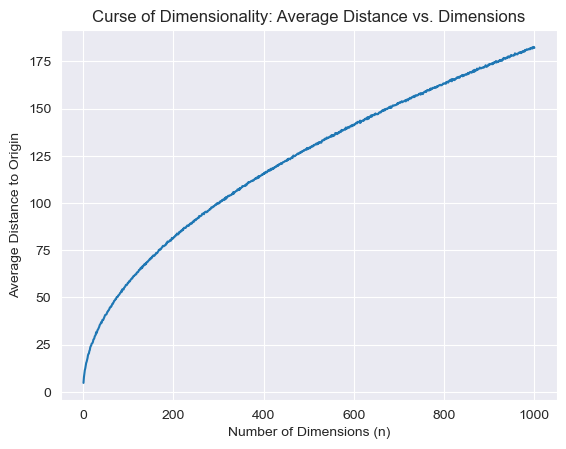

In [6]:
# Your code here
import random
import math

def euclidean_distance(p1, p2):
  """
  This function calculates the Euclidean distance between two points p1 and p2.

  Args:
      p1: A list or tuple representing the first point.
      p2: A list or tuple representing the second point.

  Returns:
      The Euclidean distance between p1 and p2.
  """

  # Check if the dimensions of the points are equal
  if len(p1) != len(p2):
    raise ValueError("Points must have the same number of dimensions.")

  # Calculate the squared difference for each dimension
  squared_differences = [(p1_i - p2_i) ** 2 for p1_i, p2_i in zip(p1, p2)]

  # Sum the squared differences
  sum_of_squared_differences = sum(squared_differences)

  # Return the square root of the sum of squared differences
  return math.sqrt(sum_of_squared_differences)

def generate_random_points(n, num_points):
  """
  This function generates a list of num_points random points in n-dimensional space.

  Args:
      n: The number of dimensions.
      num_points: The number of random points to generate.

  Returns:
      A list of random points.
  """

  points = []
  for _ in range(num_points):
    point = [random.uniform(-10, 10) for _ in range(n)]
    points.append(point)
  return points

def average_distance_to_origin(points):
  """
  This function calculates the average distance from a list of points to the origin.

  Args:
      points: A list of points.

  Returns:
      The average distance from the points to the origin.
  """

  total_distance = 0
  for point in points:
    distance = euclidean_distance(point, [0] * len(point))  # Origin point with n zeros
    total_distance += distance
  return total_distance / len(points)

# Define the number of dimensions and number of points to generate
num_dimensions = range(1, 1001)  # Investigate from n=1 to n=1000
num_points = 100

# Initialize lists to store results
average_distances = []

# Loop through each dimension
for n in num_dimensions:
  # Generate random points
  points = generate_random_points(n, num_points)

  # Calculate average distance to origin
  average_distance = average_distance_to_origin(points)
  average_distances.append(average_distance)

# Plot the results
plt.plot(num_dimensions, average_distances)
plt.xlabel("Number of Dimensions (n)")
plt.ylabel("Average Distance to Origin")
plt.title("Curse of Dimensionality: Average Distance vs. Dimensions")
plt.grid(True)
plt.show()


## Convergence Time

As mentioned before, another issue with increasing the dimension of the feature space is the training time required to fit a machine learning model. While more data will generally lead to better predictive results, it will also substantially increase training time. To demonstrate this, generate lists of random numbers as you did above. Then, use this list of random numbers as a feature in a mock dataset; choose an arbitrary coefficient and multiply the feature vector by this coefficient. Then, sum these feature-coefficient products to get an output, `y`. To spice things up (and not have a completely deterministic relationship), add a normally distributed white noise parameter to your output values. Fit an ordinary least squares model to your generated mock data. Repeat this for a varying number of features, and record the time required to fit the model. (Be sure to only record the time to train the model, not the time to generate the data.) Finally, plot the number of features, n, versus the training time for the subsequent model.

In [7]:
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression, Lasso

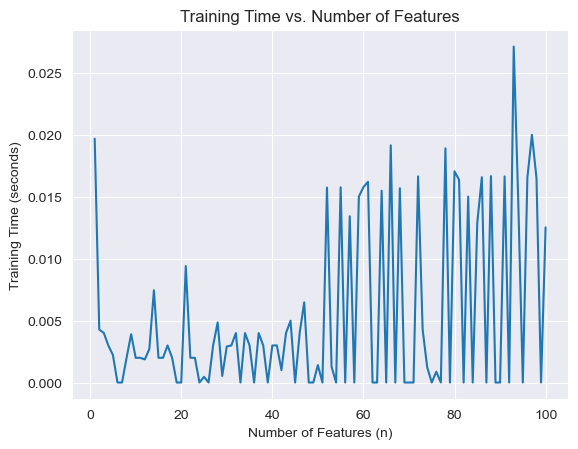

In [8]:
# ⏰ Your code may take some time to run 
import random
import time
from sklearn.linear_model import LinearRegression

def generate_random_features(n, num_samples):
  """
  This function generates a list of random feature vectors with n features.

  Args:
      n: The number of features.
      num_samples: The number of data samples to generate.

  Returns:
      A list of random feature vectors.
  """

  features = []
  for _ in range(num_samples):
    feature_vector = [random.uniform(-10, 10) for _ in range(n)]
    features.append(feature_vector)
  return features

def generate_mock_data(features, coefficient, noise_std):
  """
  This function generates mock data with features, a coefficient, and noise.

  Args:
      features: A list of feature vectors.
      coefficient: A coefficient for the linear relationship.
      noise_std: The standard deviation for the white noise.

  Returns:
      A tuple containing the feature matrix (X) and target values (y).
  """

  X = features
  y = [coefficient * sum(f) + random.gauss(0, noise_std) for f in features]
  return X, y

def train_model(X, y):
  """
  This function trains a linear regression model on the provided data.

  Args:
      X: The feature matrix.
      y: The target values.

  Returns:
      The fitted linear regression model.
  """

  start_time = time.time()
  model = LinearRegression().fit(X, y)
  training_time = time.time() - start_time
  return model, training_time

# Define parameters
num_features_range = range(1, 101)  # Investigate from n=1 to n=100 features
num_samples = 1000  # Number of data samples
coefficient = 2  # Arbitrary coefficient for linear relationship
noise_std = 1  # Standard deviation for white noise

# Initialize lists to store results
training_times = []

# Loop through different number of features
for num_features in num_features_range:
  # Generate random features
  features = generate_random_features(num_features, num_samples)

  # Generate mock data
  X, y = generate_mock_data(features, coefficient, noise_std)

  # Train the model and record training time
  model, training_time = train_model(X, y)
  training_times.append(training_time)

# Plot the results
plt.plot(num_features_range, training_times)
plt.xlabel("Number of Features (n)")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs. Number of Features")
plt.grid(True)
plt.show()


- Repeat the same experiment for a Lasso penalized regression model

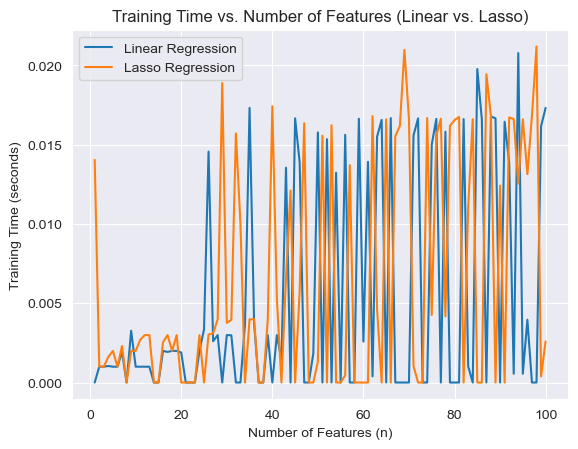

In [9]:
# ⏰ Your code may take some time to run 
import random
import time
from sklearn.linear_model import LinearRegression, Lasso

def generate_random_features(n, num_samples):
  """
  This function generates a list of random feature vectors with n features.

  Args:
      n: The number of features.
      num_samples: The number of data samples to generate.

  Returns:
      A list of random feature vectors.
  """

  features = []
  for _ in range(num_samples):
    feature_vector = [random.uniform(-10, 10) for _ in range(n)]
    features.append(feature_vector)
  return features

def generate_mock_data(features, coefficient, noise_std):
  """
  This function generates mock data with features, a coefficient, and noise.

  Args:
      features: A list of feature vectors.
      coefficient: A coefficient for the linear relationship.
      noise_std: The standard deviation for the white noise.

  Returns:
      A tuple containing the feature matrix (X) and target values (y).
  """

  X = features
  y = [coefficient * sum(f) + random.gauss(0, noise_std) for f in features]
  return X, y

def train_model(X, y, model_type="linear"):
  """
  This function trains a linear regression or Lasso model on the provided data.

  Args:
      X: The feature matrix.
      y: The target values.
      model_type: "linear" for linear regression, "lasso" for Lasso regression.

  Returns:
      The fitted model and training time.
  """

  start_time = time.time()
  if model_type == "linear":
    model = LinearRegression().fit(X, y)
  elif model_type == "lasso":
    model = Lasso().fit(X, y)
  else:
    raise ValueError("Invalid model type. Choose 'linear' or 'lasso'.")
  training_time = time.time() - start_time
  return model, training_time

# Define parameters
num_features_range = range(1, 101)  # Investigate from n=1 to n=100 features
num_samples = 1000  # Number of data samples
coefficient = 2  # Arbitrary coefficient for linear relationship
noise_std = 1  # Standard deviation for white noise

# Initialize lists to store results
linear_training_times = []
lasso_training_times = []

# Loop through different number of features
for num_features in num_features_range:
  # Generate random features
  features = generate_random_features(num_features, num_samples)

  # Generate mock data
  X, y = generate_mock_data(features, coefficient, noise_std)

  # Train linear regression model and record training time
  linear_model, linear_training_time = train_model(X.copy(), y.copy(), "linear")

  # Train Lasso regression model and record training time
  lasso_model, lasso_training_time = train_model(X.copy(), y.copy(), "lasso")

  linear_training_times.append(linear_training_time)
  lasso_training_times.append(lasso_training_time)

# Plot the results for both models
plt.plot(num_features_range, linear_training_times, label="Linear Regression")
plt.plot(num_features_range, lasso_training_times, label="Lasso Regression")
plt.xlabel("Number of Features (n)")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs. Number of Features (Linear vs. Lasso)")
plt.grid(True)
plt.legend()
plt.show()


## Optional (Level Up)

### Show Just How Slow it Can Go!

If you're up for putting your computer through the wringer and are very patient to allow the necessary computations, try increasing the maximum n from 1000 to 10,000 using Lasso regression. You should see an interesting pattern unveil. See if you can make any hypotheses as to why this might occur!

_Note:_ ⏰ _You can expect your code to take over an hour to run on a 2.7 GHz speed CPU!_

In [ ]:
# ⏰ Your code may take some time to run 

## Summary

In this lab, you conducted various simulations to investigate the curse of dimensionality. This demonstrated some of the caveats of working with large datasets with an increasing number of features. With that, the next section will explore principal component analysis, a means of reducing the number of features in a dataset while preserving as much information as possible.